# Vectorization and arrays: Period-doubling bifurcations and the Mandelbrot Set

In this notebook, we'll cover the basics of vectorization and arrays, including how to use them to compute the period-doubling bifurcations of the logistic map, and to generate the Mandelbrot set.



<!-- [Click here to open this notebook in Colab](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/talks/vectorization_mandelbrot.ipynb) -->
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/talks/vectorization_mandelbrot.ipynb)

<!-- Preamble: Run the cells below to import the necessary Python packages

*This notebook created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.* -->

In [9]:

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline

# Import numpy library for array manipulation
import numpy as np



# External libraries

A major benefit of the Python ecosystem is the ability to easily import external libraries. This is done with the `import` command. For example, the following imports the `numpy` library, which contains many useful functions for scientific computing.

```python
import numpy as np
```

Common libraries you might use in the natural sciences include
+ `matplotlib` for general plotting
+ `numpy` for linear algebra and lots of MATLAB functions
+ `scipy` for common scientific algorithms
+ `scikit-learn` for machine learning
+ `networkx` for manipulating graphs and networks

Major libraries you might use in data science include
+ `numba` for just-in-time compilation of numpy-based code, which can be used to speed up computations and work around the lack of a compiler for Python.
+ `pandas` for large dataset organization, similar to R's `data.frame` and SQL tables
+ `statsmodels` for statistics and data analysis, with API similar to R's `lm` and `glm`
+ `seaborn` for alternative plotting, with API similar to R's ggplot
+ `PyTorch` for deep learning.
+ `JAX` for automatic differentiation and GPU acceleration, as well as deep learning


To use an external library that is not already installed with Python, you can install it using Python's package manager, `pip`.

```bash
    pip install pandas
```

This will install whatever version of the package has been made available by the package maintainer on the [Python Package Index](https://pypi.org/). `pip` will also install all dependencies of the package, and update any existing installations or dependencies. After installing a package into Python, you usually must relaunch your Python kernel.

### Dependency conflicts and virtual environments

When installing a single package like `pandas`, you will often find that `pip` installs a large number of other packages on which `pandas` depends, including `numpy`. However, if you later install another external package like `scikit-learn`, it may also depend on `numpy`. If `scikit-learn` requires the same version that `pandas` already installed, `pip` will not install a second copy, it will simply use the existing copy. Likewise, if the `scikit-learn` version is a newer release that requires a newer version of `numpy`, by the newer version is also compatible with `pandas`, then `pip` will go ahead and install the newer version, overwriting the older version. 

An issue arises if the second package requires a different version of `numpy` than the first, and the two versions are not compatible. In that case, the package manager will run into conflicts. In large projects with many dependencies, managing these chains of dependencies can become quite difficult.

One solution to this problem is to use a virtual environment. A virtual environment is a self-contained Python installation, including a copy of the Python interpreter, a copy of the standard library, and a copy of all the external libraries you have installed. This allows you to have different versions of the same library installed for different projects, and it allows you to isolate the dependencies for one project from the rest of your projects. Most Python distributions include a package manager for creating and managing virtual environments, such as `conda`, `mamba`, `uv`, `venv`, and `pyenv`. Many of these environment managers also include their own alternative to `pip` for installing packages, which can manage conflicts.


### Numpy

Numpy is technically an external library, but we will use it so often in scientific computing that it's basically a built-in data type for our purposes. The key feature of numpy is the `ndarray` datatype, which represents tensors. Most functions for linear algebra and other scientific computing tasks are within numpy, and many share the same names and syntax as their MATLAB equivalents.



In [97]:
import matplotlib.pyplot as plt # Plotting library
import numpy as np # Linear algebra library
import scipy # General scientific computing library


## Arrays, indexing, broadcasting, vectorization

In [ ]:
# Create an array of integers from 0 to 9
a = np.arange(10)

print(a)
type(a)

[0 1 2 3 4 5 6 7 8 9]


numpy.ndarray

In [5]:
# Sample random numbers from a uniform distribution
a = np.random.random((2, 3))
print(a)
print(a.shape)


[[0.32654772 0.98483793 0.0360194 ]
 [0.78012883 0.16673683 0.19392   ]]
(2, 3)


In [7]:
# Create a square identity matrix
a = np.identity(7)
print(a)
print(a.shape)


[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
(7, 7)


In [8]:
# Create an order-3 tensor with all elements equal to 1
a = np.ones((100, 33, 22))
print(a.shape)

(100, 33, 22)


## The logistic map

The logistic map is a recurrence relation that maps a single scalar value to another scalar value. It is often cited as an archetypal example of how complex, chaotic behaviour can arise from very simple nonlinear dynamical equations.

The map is defined by:

$$x_{n+1} = r x_n (1 - x_n)$$

where the dynamical variable $x_n \in (0, 1)$ is a number between zero and one. The parameter $r$ represents a growth rate, and varies between zero and four.

In [10]:
def logistic_map(x, r=3.7):
    """
    The logistic map, a discrete-time dynamical system.

    Args:
        x (float): a number in [0, 1] denoting the current state
        r (float): a positive parameter that controls the chaoticity of the dynamics
    """
    return r * x * (1 - x)

Text(0, 0.5, 'x')

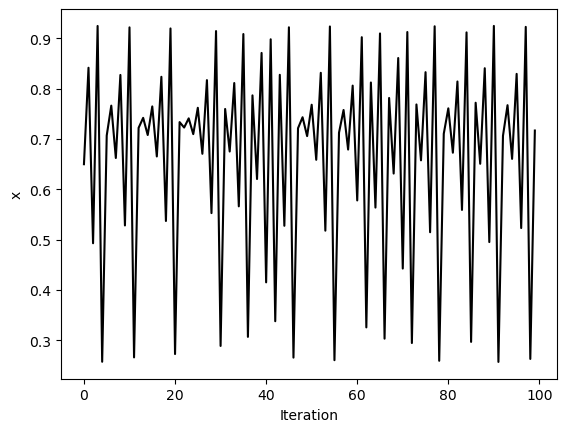

In [11]:
x = [0.65]
for i in range(1, 100):
    x.append(logistic_map(x[i-1]))
plt.figure()
plt.plot(x, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

 For $r$ values between zero and one, the population always dies out. However, as $r$ increases past one, a bifurcation occurs at $r=3$, where the population begins to oscillate between two values. As $r$ increases further, period doubling occurs, leading to four values, then eight, and so on, until finally chaos occurs, and the population takes on seemingly random values between zero and one.

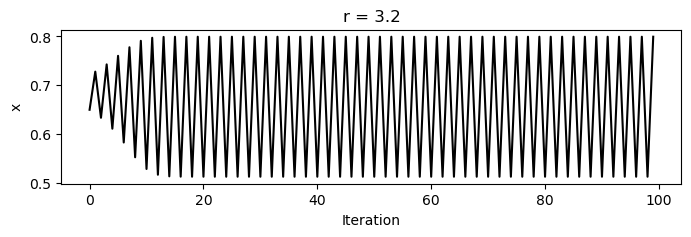

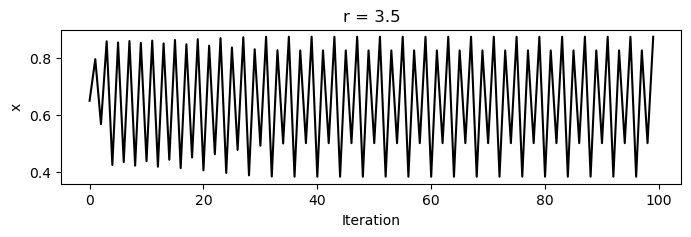

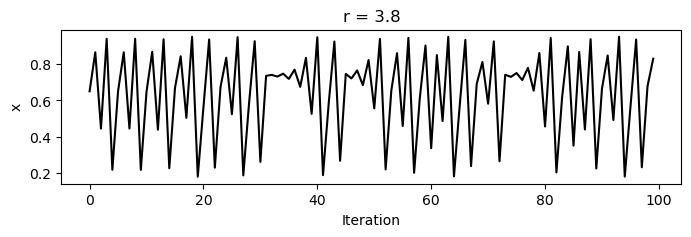

In [17]:
for r in [3.2, 3.5, 3.8]:
    x = [0.65]
    for i in range(1, 100):
        x.append(logistic_map(x[i-1], r))
    plt.figure(figsize=(8, 2))
    plt.plot(x, 'k')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.title(f'r = {r}')


## Runtime complexity and dynamical systems

 A common question we might ask for an algorithm is: How does the runtime scale with the input size? What about the memory usage? These are sometimes called the asymptotic *time and space complexities* of an algorithm. The asymptotic complexity of an algorithm is *independent* of the hardware and software environment. It is a representationn-invariant mathematical property of the algorithm.

In [194]:
import numpy as np

def simulate_logistic(n, r=3.8, x0=0.65):
    """
    Simulate the logistic map for n iterations using numpy and preallocation

    Args:
        n (int): The number of iterations of the logistic map
    """
    x = np.zeros(n) # Preallocate an array of zeros
    x[0] = x0
    for i in range(1, n):
        prev = x[i - 1]
        x[i] = r * prev * (1 - prev)
    return x

# x = simulate_logistic(1000)
# plt.plot(x, 'k')

%timeit simulate_logistic(1000)

188 µs ± 3.88 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Text(0, 0.5, 'Runtime (s)')

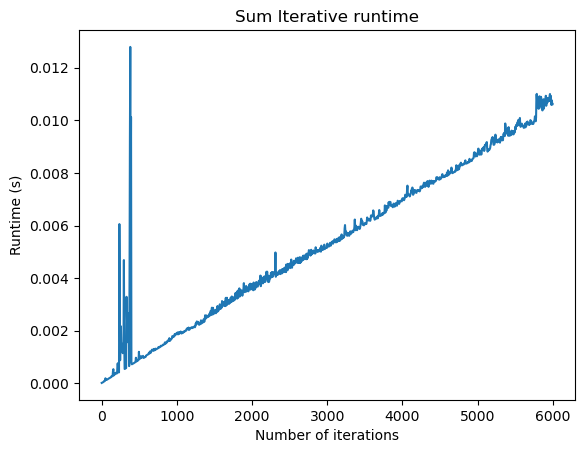

In [17]:
import timeit

n_vals = np.arange(1, 6000, 5)
# n_vals = np.logspace(1, 5, 50, dtype=np.int32)

times = []
for n in n_vals:
    times.append(timeit.timeit("simulate_logistic(n)", globals=globals(), number=10))

plt.figure()
plt.plot(n_vals, times)
plt.title("Sum Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")


Notice that in the asymptotic regime the runtime scales linearly. Why is the runtime $\sim N$? We only "touch" each element of our solution array twice---once to calculate it, and once to update the next state. We don't need to look back at all the previous states during each update, and so adding additional iterations doesn't incur an unexpected cost. In our case, the memory usage is also $\sim N$ because we are storing the full, cumulative history in order to plot the trajectory. If we only wanted to plot the final state, we could get away with only storing the final state. In this case, the memory would be $\sim 1$.

Now that we have a fast implementation of the logistic map, we can explore its properties in more detail. We will create a **bifurcation diagram**, which shows the values of $x_n$ for each value of $r$. For many values of $r$, we simulate the population dynamics for a long time, discarding an initial transient. We then record all of the unique values of $x_n$ that we observe, and plot all of them as points versus that value of $r$. The bifurcation diagram is thus a one-to-many mapping from $r$ to multiple values of $x_n$. 

Storing the unique values of $x_n$ is a little fuzzy since $x_n$ is a continuously-valued variable and so, in principle, every single $x_n$ is a different number to within machine precision, but if there are any signs of discretization, we can see them in the bifurcation diagram.

In [18]:
def bifurcation_diagram(dmap, x0, pvals, n=1000, transient=0.5):
    """
    Create a bifurcation diagram of a discrete map.

    Args:
        dmap (callable): A function that takes two arguments, x and p, and returns the next
            value of x in the discrete map.
        x0 (float): The initial condition of the system.
        pvals (list): A list of parameter values.
        n (int): The number of iterations of the map to run for each parameter value.
        transient (float): The proportion of the initial iterations to discard as transient.

    Returns:
        xvals (list): A list of lists of x values.
    """
    n_discard = int(transient * n)
    all_xvals = []
    for p in pvals:
        vals = simulate_logistic(n, r=p, x0=x0)
        all_xvals.append(vals[n_discard:])

    return all_xvals

Text(0, 0.5, 'x')

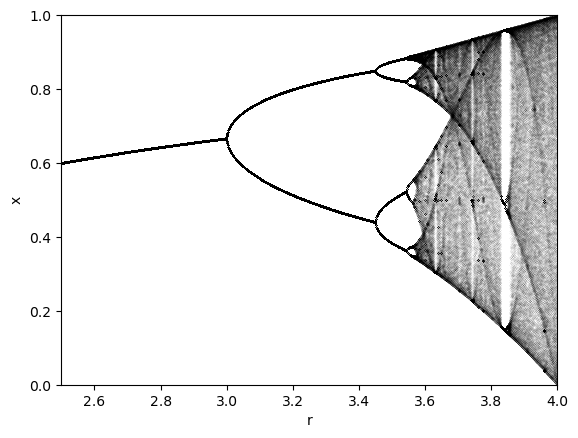

In [21]:

rvals = np.linspace(2.5, 4.0, 1000)
xvals = bifurcation_diagram(logistic_map, 0.65, rvals)

for r, x in zip(rvals, xvals):
    plt.plot([r] * len(x), x, '.k', markersize=0.05)
plt.xlim(rvals[0], rvals[-1])
plt.ylim(0, 1)
plt.xlabel('r')
plt.ylabel('x')






The logistic map follows the celebrated period-doubling route to chaos. As the parameter $r$ increases, the period of the oscillations doubles, until chaos occurs at $r \approx 3.57$.


Notice how the spacing in $r$ between the period-doubling bifurcations decreases as $r$ increases. The geometric rate of decrease in the spacing between bifurcations is a constant value called the Feigenbaum constant.

# Slicing and indexing numpy arrays

Numpy arrays follow the same indexing rules as Python lists. We can slice them and index them using the same syntax. Below, we will use slicing to create a *return map* of the logistic map. This is a plot of $x_{n+1}$ vs. $x_n$.

Text(0, 0.5, 'Next Iteration')

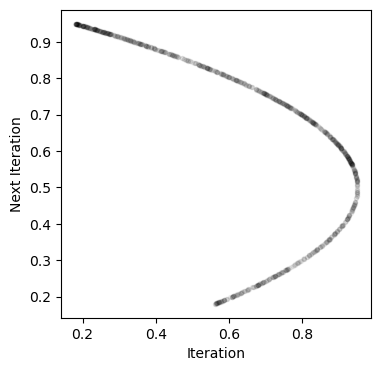

In [31]:
traj = simulate_logistic(1000)

plt.figure(figsize=(4, 4))
plt.plot(traj[1:], traj[:-1], '.k', alpha=0.05)
plt.xlabel('Iteration')
plt.ylabel('Next Iteration')



We can also consider higher-order return maps, which plot $x_{n+k}$ vs. $x_n$. For example, for $k=2$

Text(0, 0.5, 'Next Next Iteration')

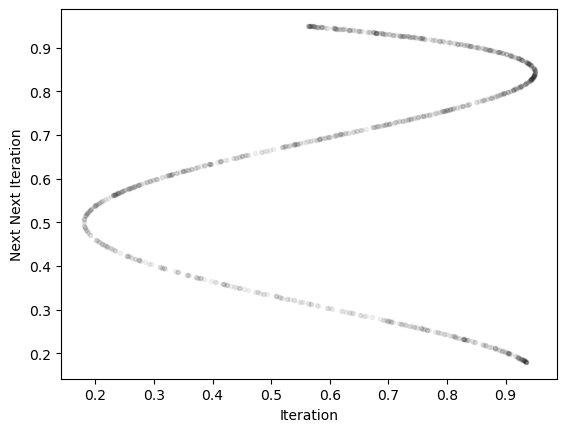

In [24]:
k = 2

plt.figure()
plt.plot(traj[k:], traj[:-k], '.k', alpha=0.05)
plt.xlabel('Iteration')
plt.ylabel('Next Next Iteration')

### Strided slicing

We can use strided slicing to take every $k^{th}$ element of an array. To illustrate this effect, we wil first simulate the Logistic map for several values of the bifurcation parameter $r$. We will store all of these trajectories in a list.











Text(0, 0.5, 'x')

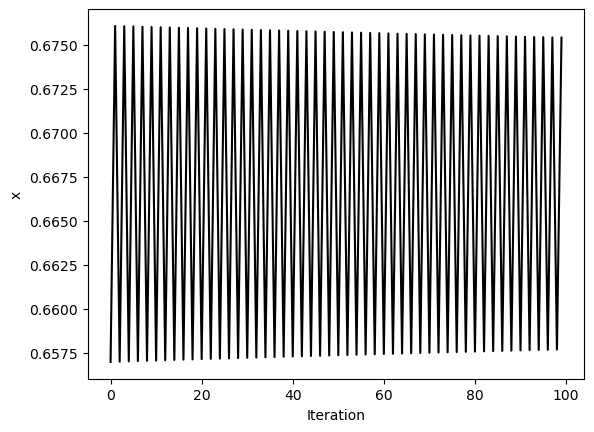

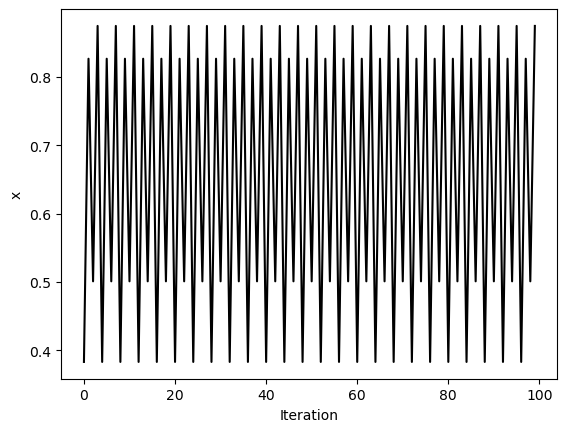

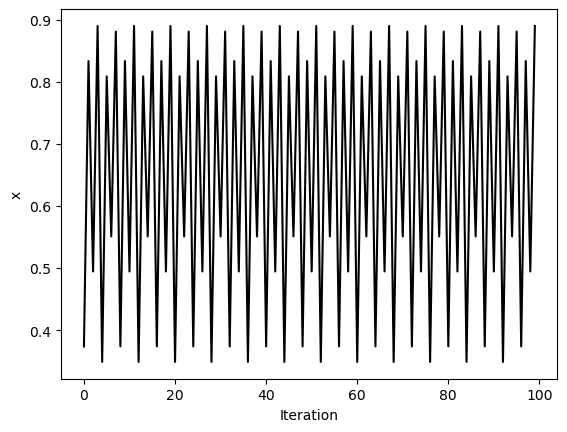

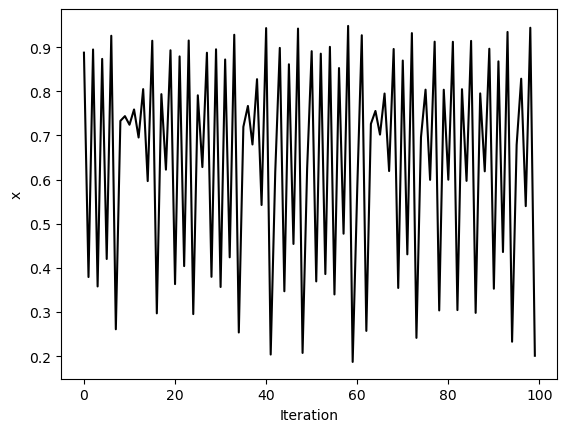

In [55]:
# simulate before and after period doubling
# Take last 50 iterations to remove transient

traj2 = simulate_logistic(500, r=3)[-100:]
plt.figure()
plt.plot(traj2, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

traj4 = simulate_logistic(500, r=3.5)[-100:]
plt.figure()
plt.plot(traj4, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

traj8 = simulate_logistic(1000, r=3.56)[-100:]
plt.figure()
plt.plot(traj8, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

traj_inf = simulate_logistic(500)[-100:]
plt.figure()
plt.plot(traj_inf, 'k')
plt.xlabel('Iteration')
plt.ylabel('x')

We can see that these trajectories all look pretty different, but what happens if we resample them? We will use strided slicing to take every nth element of each array.

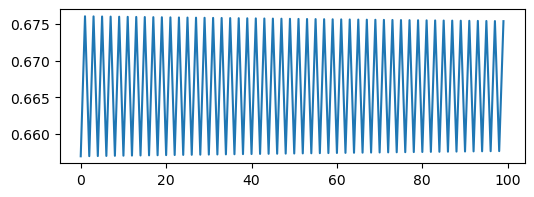

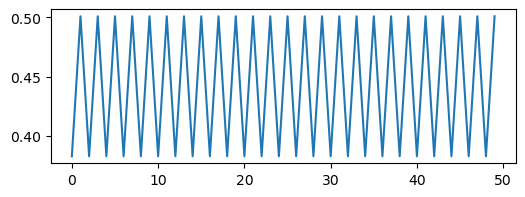

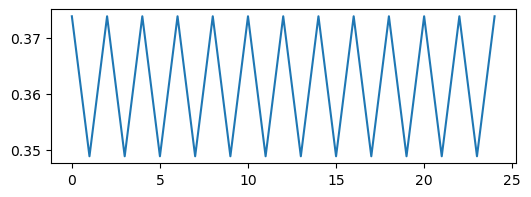

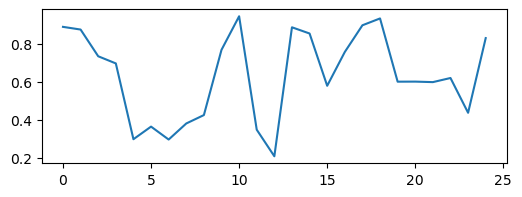

In [56]:
plt.figure(figsize=(6, 2))
plt.plot(traj2)

plt.figure(figsize=(6, 2))
plt.plot(traj4[::2])

plt.figure(figsize=(6, 2))
plt.plot(traj8[::4])

plt.figure(figsize=(6, 2))
plt.plot(traj_inf[::4])

We can see a trivial self-similarity in the trajectories in the ordered phase: we can take every other element of a discrete period-4 trajectory, and it looks like a period-2 trajectory. Likewise, we can take every fourth element of a period-8 trajectory, and it looks like a period-2 trajectory. However, we can't do this for the chaotic phase. 

## Recurrence plots

We can see that the logistic map exhibits markedly different dynamics in different regimes. The chaotic phase is erratic and non-repeating. However, if we encountered a time series from the chaotic phase, we might wonder whether it came from a chaotic deterministic system, or a stochastic system.

One way to address this question is to calculate the *recurrence plot* of the time series. The recurrence plot shows the distance between all points in the time series.
$$
    R_{ij} = |x_i - x_j|
$$



In [33]:
def recurrence_plot(x):
    """
    Calculate the recurrence plot of a time series.
    """
    R = np.zeros((len(x), len(x))) # Initialize an empty square matrix
    for i in range(len(x)):
        for j in range(len(x)):
            R[i, j] = np.abs(x[i] - x[j])
    return R



We have already calculated example trajectories for a logistic map in the ordered and chaotic regimes. We will also, for comparison, calculate a random time series.

Text(0.5, 1.0, 'Periodic Logistic Map')

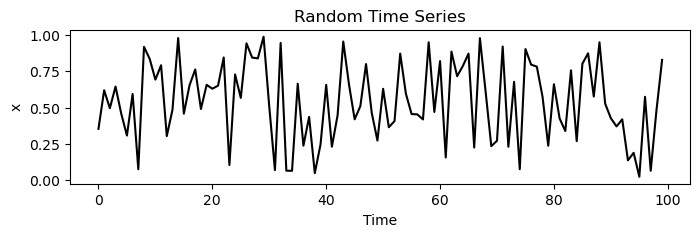

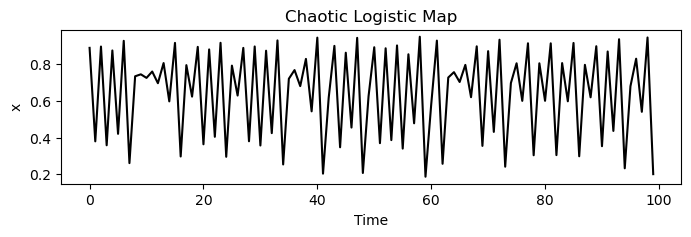

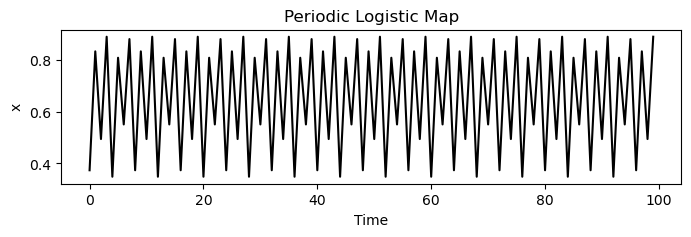

In [57]:
traj_noise = np.random.uniform(0, 1, 100)

plt.figure(figsize=(8, 2))
plt.plot(traj_noise, 'k')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Random Time Series')

plt.figure(figsize=(8, 2))
plt.plot(traj_inf, 'k')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Chaotic Logistic Map')

plt.figure(figsize=(8, 2))
plt.plot(traj8, 'k')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Periodic Logistic Map')



Text(0.5, 1.0, 'Periodic Logistic Map')

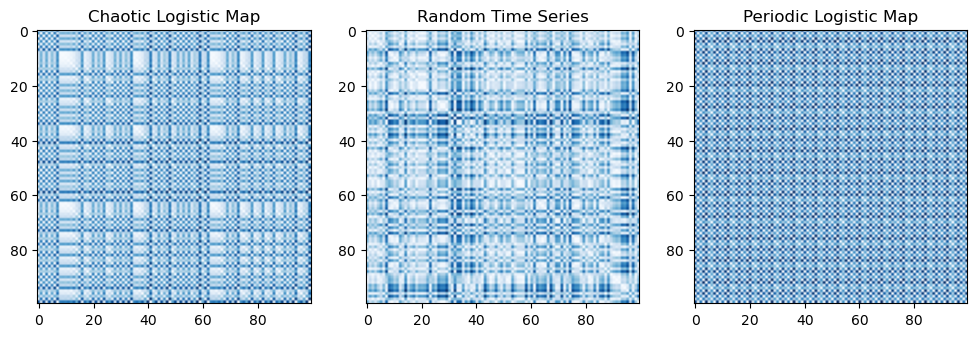

In [59]:
# 1 x 3 subplots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(recurrence_plot(traj_inf), cmap='Blues', vmin=0)
plt.title('Chaotic Logistic Map')
plt.subplot(1, 3, 2)
plt.imshow(recurrence_plot(traj_noise), cmap='Blues', vmin=0)
plt.title('Random Time Series')
plt.subplot(1, 3, 3)
plt.imshow(recurrence_plot(traj8), cmap='Blues', vmin=0)
plt.title('Periodic Logistic Map')


### Boolean Selection with numpy arrays

We can also index into the elements of Python arrays by using a Boolean array of the same shape. These will select out elements of the outer array wherever the Boolean array is True. Regardless of the shape of the outer array, the resulting array be a 1D array with length equal to the number of True elements in the Boolean array.











In [83]:

def recurrence_plot_thresholded(x, threshold=0.5):
    """
    Calculate the recurrence plot of a time series, with a threshold.
    """
    R = recurrence_plot(x)
    return R > threshold


This function only differs from the original recurrence plot function by one line, but that line performs and elementwise comparison between the recurrence plot matrix and a float threshold. This returns a new matrix with the same shape as the original, but with type `bool`.



Text(0.5, 1.0, 'Periodic Logistic Map')

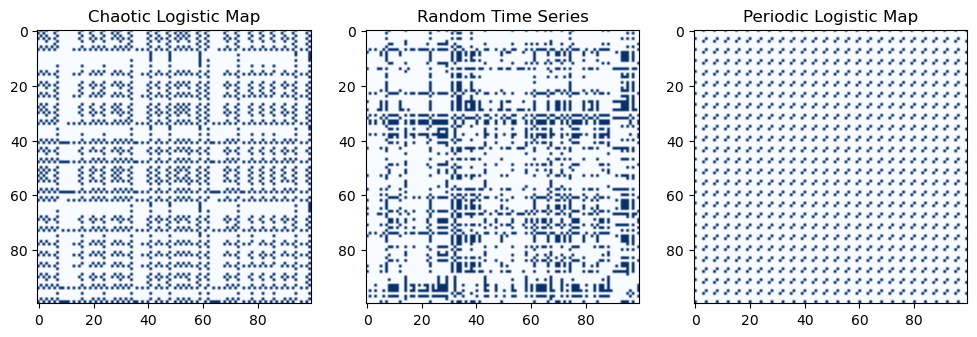

In [84]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(recurrence_plot_thresholded(traj_inf), cmap='Blues', vmin=0)
plt.title('Chaotic Logistic Map')
plt.subplot(1, 3, 2)
plt.imshow(recurrence_plot_thresholded(traj_noise), cmap='Blues', vmin=0)
plt.title('Random Time Series')
plt.subplot(1, 3, 3)
plt.imshow(recurrence_plot_thresholded(traj8), cmap='Blues', vmin=0)
plt.title('Periodic Logistic Map')

We can also use Boolean selection to select points from an array. For example, we can select all points from an array that are less than 0.5.

In [91]:
def recurrence_plot_thresholded(x, threshold=0.5):
    """
    Calculate the recurrence plot of a time series, with a threshold.
    """
    R = recurrence_plot(x)
    selection = R > threshold
    # print(selection.shape)
    R[selection] = 1
    R[~selection] = 0
    return R


(100, 100)


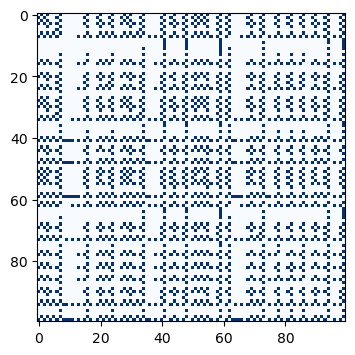

In [90]:
plt.figure(figsize=(12, 4))
plt.imshow(recurrence_plot_thresholded(traj_inf), cmap='Blues', vmin=0)

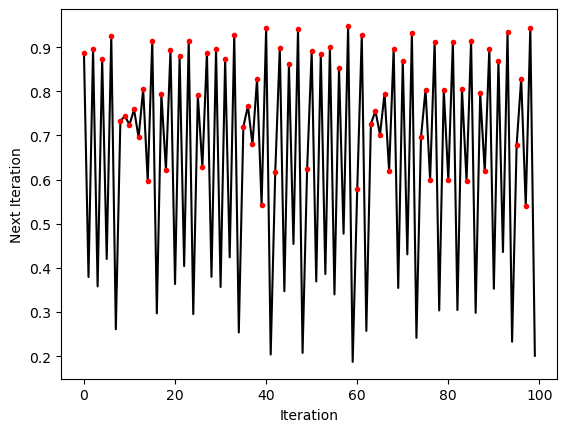

In [94]:
select_inds = traj_inf > 0.5
# print(select_inds)
# nvals = np.arange(len(traj))

nvals = np.arange(len(traj_inf))

plt.figure()
plt.plot(nvals, traj_inf, 'k')
plt.xlabel('Iteration')
plt.ylabel('Next Iteration')
plt.plot(nvals[select_inds], traj_inf[select_inds], '.r')


## Finding the changepoints of a time series


Now, let's use Boolean selection to select the points corresponding to when the logistic map crosses the point $x = 0.5$. We will first threshold the trajectory into a series of 0s and 1s corresponding to whether the trajectory is above or below 0.5. We then use `np.diff`, which calculates the difference between subsequent elements of the logistic map, in order to find places where the map crosses the threshold.


Text(0, 0.5, 'Frequency')

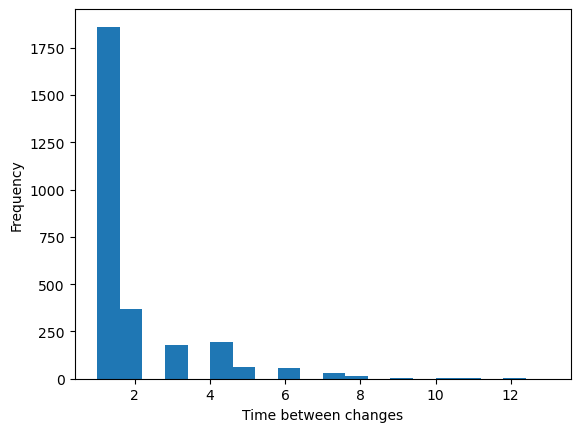

In [96]:
## We want to perform a longer simulation
traj = simulate_logistic(5000)

where_big = (traj > 0.5).astype(int)
where_change = np.diff(where_big)
changepoints = (where_change != 0)
changepoint_inds = np.where(changepoints)[0]

time_between_changes = np.diff(changepoint_inds)

plt.figure()
plt.hist(time_between_changes, bins=20);
plt.xlabel('Time between changes')
plt.ylabel('Frequency')



Interestingly, we observe an exponential waiting time distribution, in which the map occasionally takes a very long amount of time to cross from one side of the threshold to the other.

In [100]:
changepoints

array([False,  True,  True, ...,  True,  True,  True], shape=(4999,))

### Fancy indexing

+ Can pass lists of indices to modify

In [56]:
a = np.array([1, 2, 3, 4, 5, 6, 7])

sel_inds = [0, 2, 4]

a[sel_inds] = 0
print(a)

[0 2 0 4 0 6 7]


### Broadcasting

We can slice numpy arrays just like lists, but in multiple dimensions. However, numpy arrays recognize a formal difference between singleton dimensions and empty dimensions.

In [102]:
positions1 = np.random.random(size=(1000,))
print("Empty dimensions", positions1.shape) 

positions2 = np.random.random(size=(1000, 1))
print("Singleton dimension", positions2.shape) # Elementwise (Hadamard)

Empty dimensions (1000,)
Singleton dimension (1000, 1)


In 1D, singleton dimensions distinguish between row and column vectors, and the same idea holds for higher-dimensional arrays. We will often exploit singleton dimensions in order to guide numpy regarding the linear algebra operations we want to perform. 

In [103]:
print((positions1 * positions1.T).shape) # Elementwise (Hadamard)

print((positions2 * positions2.T).shape) # Implicit outer product 

(1000,)
(1000, 1000)


We can lift an array to higher dimensions by adding singleton dimensions. This can be done by indexing into the array with `np.newaxis` or by using the `None` keyword.

In [106]:
positions = np.random.random(size=(1000,))
print(positions.shape)

positions = positions[None, :]
print(positions.shape)

positions = positions[None, :, None, None, None]
print(positions.shape)


(1000,)
(1, 1000)
(1, 1, 1, 1, 1, 1000)


# Vectorization

Vectorization does not change the intrinsic runtime scaling of an algorithm, but it changes the prefactor. However, faster runtime can sometimes come at the expense of higher memory usage.

Let's try finding the pairwise distance matrix between two sets of points in two-dimensions. We will do this in two ways: a naive way, and a vectorized way.

Mathematically, we have a vector $X$ of shape $(N, 2)$. We wish to compute the matrix $D$ of shape $(N, N)$, where $D_{ij} = ||X_i - X_j||_2$.


In [107]:
# Random positions dataset
positions = np.random.random(size=(200, 2))
print(positions.shape)

(200, 2)


In [246]:

# pairwise distance matrix will be 100 x 100
def find_distances_iterative(positions):
    """Find the pairwise distances between a set of points"""
    list_of_distances = list()
    for i in range(positions.shape[0]): # Loop over rows
        row_distances = list()
        for j in range(positions.shape[0]): # Loop over columns
            elementwise_distances = list()
            for k in range(positions.shape[1]): # Loop over dimensions
                elementwise_distances.append((positions[i, k] - positions[j, k])**2)
            total_distance = sum(elementwise_distances)
            row_distances.append(np.sqrt(total_distance))
        list_of_distances.append(row_distances)
    distance_matrix = np.array(list_of_distances)
    return distance_matrix

%timeit find_distances_iterative(positions)
# find_distances_iterative(positions).shape

45.7 ms ± 287 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Now, let's modify our approach to use a built-in numpy function, `np.linalg.norm`, which calculates the Euclidean norm of a vector. This function is internally vectorized, allowing it to process all dimensions a vector quickly. 

Since we know the shape of our output matrix, we can also preallocate the memory for it using `np.zeros`. This is usually a good practice to avoid Python having to continually resize a list as we add elements to it. However, the speed-up is not as dramatic as in older languages like MATLAB, due to differences in the way that lists and arrays are implemented in Python.

Conceptually, we can think of vectorization as numpy processing all of the dimensions of the array at once, rather than looping over them one at a time.


In [156]:

def find_distances_preallocated(positions):
    """
    Find distance matrix with preallocated memory and built-in elementwise numpy functions
    """
    distances = np.zeros((positions.shape[0], positions.shape[0]))
    for i in range(positions.shape[0]):
        for j in range(positions.shape[0]):
            distance = np.linalg.norm(positions[i, :] - positions[j, :])
            distances[i, j] = distance
    return distances

%timeit find_distances_preallocated(positions)


66 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


+ We can do even better if we take the idea of vectorizing a bit further

+ We think about the distinct "dimensions" present in our problem: the two dimensions of the output array (both have value $200$), which each correspond to the first dimension of the input array, and the dimension corresponding to the second dimension of the input array, which has value $2$. 

+ We therefore expect that we need to perform an expansion first, to lift the dimensionality of our $(200, 200)$ input array to an intermediate with shape $(200, 200, 2)$. We can do this using numpy's broadcasting rules. Since we want to find the difference between each element of the input array with itself, we need to do a broadcast subtraction.

+ We next need to perform a contraction, which pulls the $(200, 200, 2)$ intermediate array back down to a $(200, 200)$ output array. We can do this using numpy's built-in functions, which are optimized for linear algebra operations. Since we are computing the Euclidean norm, we can use `np.linalg.norm` to do this contraction in a single step. Other common contractions might include `np.sum`, `np.mean`

In [255]:
print(positions.shape)
print(positions[:, None, :].shape)
print(positions[None, :, :].shape)
print((positions[:, None, :] - positions[None, :, :]).shape)
print(np.linalg.norm((positions[:, None, :] - positions[None, :, :]), axis=2).shape)

(200, 2)
(200, 1, 2)
(1, 200, 2)
(200, 200, 2)
(200, 200)


In [256]:
# pairwise distance matrix
def find_distances_vectorized(positions):
    """
    Find distance matrix vectorized with broadcasting
    """
    return np.linalg.norm(
        positions[:, None, :] - positions[None, :, :], 
    axis=2)

%timeit find_distances_vectorized(positions)

617 µs ± 5.05 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [95]:
import timeit

n_vals = np.arange(1, 100, 1)

all_times = []
for n in n_vals:
    time1 = timeit.timeit("find_distances_iterative(np.random.random((n, 2)))", globals=globals(), number=n)
    # time2 = timeit.timeit("find_distances_preallocated(np.random.random((n, 2)))", globals=globals(), number=n)
    time3 = timeit.timeit("find_distances_vectorized(np.random.random((n, 2)))", globals=globals(), number=n)
    all_times.append([time1, time2, time3])
all_times = np.array(all_times)




Text(0, 0.5, 'Runtime (s)')

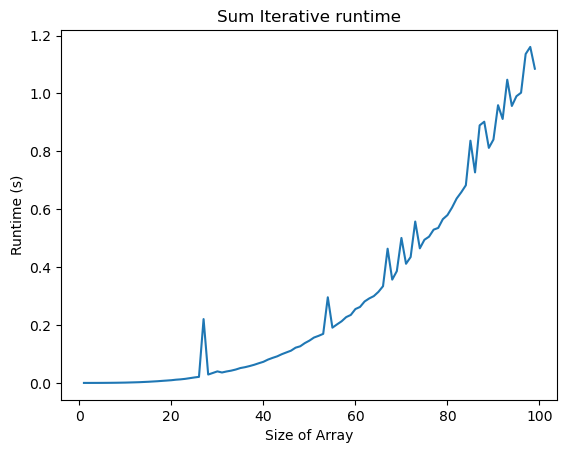

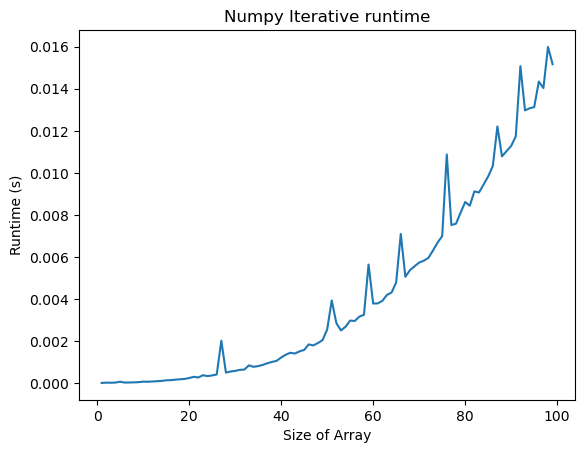

In [259]:
n_vals = np.arange(1, len(all_times[:, 0]) + 1, 1)

plt.figure()
plt.plot(n_vals, all_times[:, 0])
plt.title("Sum Iterative runtime")
plt.xlabel("Size of Array")
plt.ylabel("Runtime (s)")

# plt.figure()
# plt.plot(n_vals, all_times[:, 1])
# plt.title("Numpy Iterative runtime")
# plt.xlabel("Size of Array")
# plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 2])
plt.title("Numpy Iterative runtime")
plt.xlabel("Size of Array")
plt.ylabel("Runtime (s)")

### The scaling stays the same, but the prefactor changes

The runtime of both functions appears to increase faster than linearly with the number of points, $N$. This makes sense, because finding the distance between all pairs of $N$ objects requires $\sim \mathcal{O}(N^2)$ operations. But the *prefactor* (the scale of the y-axis) is much lower for the vectorized code. So vectorization offers a practical speedup, but not an intrinsic change in the complexity of the problem.Generally, we should think of runtime complexity as an intrinsic mathematical property of the algorithm, while the "prefactor" is a practical consideration that depends on the implementation and hardware.

Under the hood, in vectorized code, numpy still loops over the elements of the array, but defers this operation to C, a compiled language, rather than Python. So by expressing our program using higher-level mathematical objects, we gave numpy enough insight into the code to properly optimize it. Generally, in vectorization, we think of the compiled, behind-the-scenes code as being executed instantaneously or in parallel (even if it's not actually in practice). Whenever you have an array operation that seems like it can be done in parallel, there's likely a way to vectorize it.

## Finding the fractal basins of attraction of the Mandelbrot set


The Mandelbrot dynamical system is defined by the following iteration:

$$
z_{t + 1} = z_{t}^2 + c
$$
where the complex number $z = x + i y$ encodes a two-dimensional spatial position. We can equivalently write this as a pair of real-valued update rules for the real and imaginary parts of $z$:

$$
x_{t + 1} = x_t^2 - y_t^2 + c \\
y_{t + 1} = 2 x y 
$$

Depending on the value of $c$, the trajectory of $z_t$ may diverge to infinity, or converge to a finite value. The set of points $c$ for which the trajectory of $z_t$ does not diverge is known as the Mandelbrot set. 

### Implementing the Mandelbrot set

For our implementation of the Mandelbrot set, we could work directly with float arrays for $x$ and $y$. However, Python conveniently provides a built-in `complex` data type, which is a pair of floats representing the real and imaginary parts of a complex number. We will use this data type to represent the complex numbers in our Mandelbrot set.

Let's start by plotting two trajectories of the Mandelbrot set that start from different initial conditions. 


Text(0.5, 1.0, 'Mandelbrot Set Trajectory when $z_0 = (-0.5+0.5j)$')

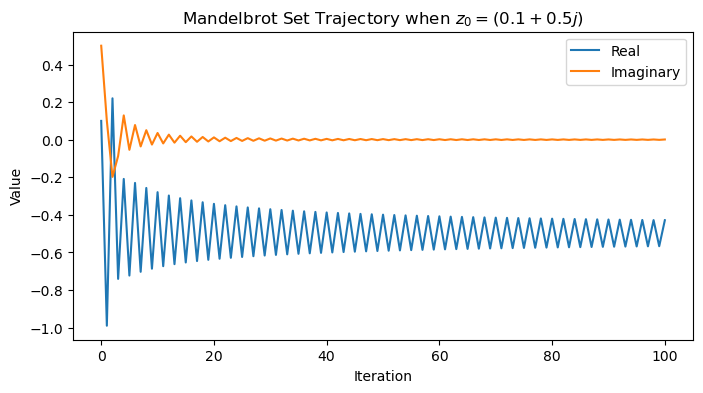

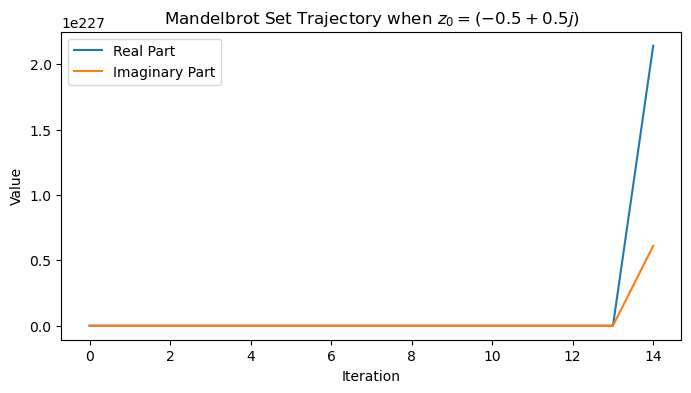

In [93]:
def mandelbrot_map(z0, c=-3/4, max_iters=100):
    """
    Compute the Mandelbrot fractal using iteration and a vectorized approach

    Args:
        z0 (complex): The initial condition for the Mandelbrot set
        c (complex): The control parameter for the map
        max_iters (int): The maximum number of iterations to perform

    Returns:
        z (complex): A 2D array of complex numbers, with values of 0 or 1 depending on 
            whether they diverge or not
    """
    z = [z0]
    for i in range(max_iters):
        z.append(z[-1]**2 + c)
    return np.array(z)

# A single complex number in Python, here representing an initial condition
z0 = 0.1 + 1j * 0.5 
traj = mandelbrot_map(z0)

plt.figure(figsize=(8, 4))
plt.plot(np.real(traj))
plt.plot(np.imag(traj))
plt.legend(['Real', 'Imaginary'])
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title(f'Mandelbrot Set Trajectory when $z_0 = {z0}$')


z0 = -0.5 + 1j * 0.5
traj = mandelbrot_map(z0)

plt.figure(figsize=(8, 4))
plt.plot(np.real(traj))
plt.plot(np.imag(traj))
plt.legend(['Real Part', 'Imaginary Part'])
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title(f'Mandelbrot Set Trajectory when $z_0 = {z0}$')

We are interested in finding the basins of attraction, which the subregions of the complex plane that converge to the same asymptotic value. We can do this by computing trajectories of the Mandelbrot set for a grid of initial conditions in the complex plane.

In our implementation, we iterate over a grid of initial conditions and then calculate the trajectory under the Mandelbrot map. If the absolute value of the trajectory exceeds a threshold, we assume that means that those initial conditions diverged. We therefore assign the initial condition to the basin of attraction corresponding to the threshold that was exceeded.

In [ ]:
def mandelbrot_iterative(z, maxiter=20, horizon=2.0, c=-3/4):
    """
    An implementation of the Mandelbrot set using iterative loops
    We use the built-in complex type, although we could have also split into separate 
    iterations for the real and imaginary parts

    Args:
        z (complex): A 2D array of complex numbers to iterate
        maxiter (int): The maximum number of iterations to perform
        horizon (float): The maximum value of the magnitude of the complex number
        c (complex): The control parameter for the map

    Returns:
        z (complex): A 2D array of complex numbers, with values of 0 or 1 depending on 
            whether they diverge or not
    """
    n, m = z.shape
    
    for i in range(n):
        for j in range(m):
            for t in range(maxiter):
                if abs(z[i, j]) >= horizon:
                    z[i, j] = horizon
                else:
                    z[i, j] = z[i, j]**2 + c
    return z


# Define a list of the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 600), np.linspace(-1, 1, 600))
zz = xx + 1j * yy

print(zz.shape)

# # print(zz.shape)
horizon_vals = mandelbrot_iterative(zz)



(600, 600)


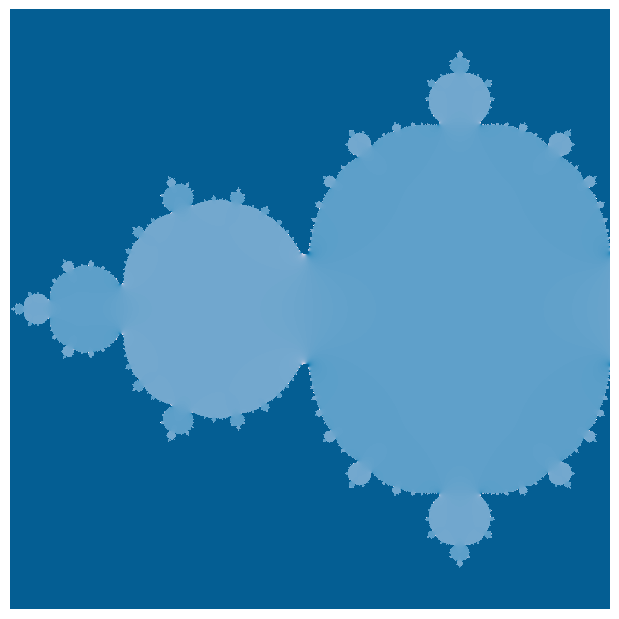

In [34]:
plt.figure(figsize=(12, 6))
plt.imshow(np.real(horizon_vals), cmap="PuBu")
plt.axis('off'); plt.tight_layout(pad=0) # remove all axes, padding, and ticks

In our vectorized implementation, we will use the same algorithm, but we will iterate the entire initial condition array all at the same time. We will use Boolean indexing to assign different values, depending on whether a given array point is diverging or not.

Text(0.5, 1.0, 'Mandelbrot Set')

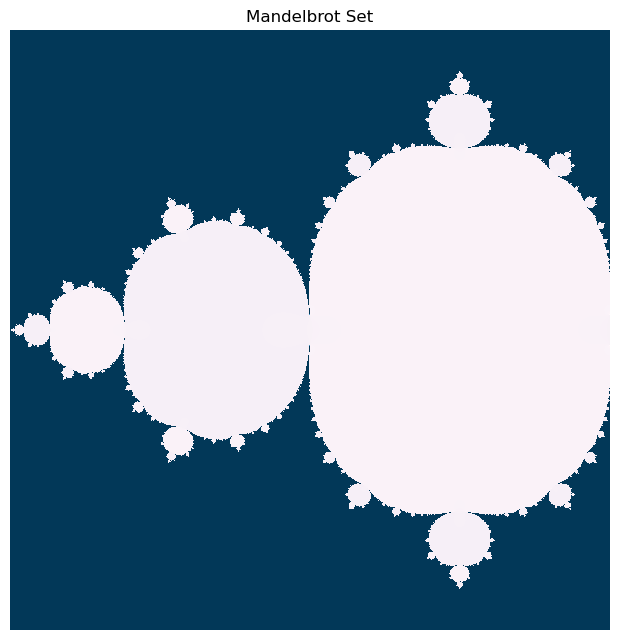

In [ ]:
def mandelbrot_numpy(z, max_iter=20, horizon=5.0, c=-3/4):
    """
    A vectorized implementation of the Mandelbrot set using numpy

    Args:
        z (complex): A 2D array of complex numbers to iterate
        max_iter (int): The maximum number of iterations to perform before giving up
        horizon (float): The maximum value of the magnitude of the complex number
        c (complex): The control parameter for the map

    Returns:
        z (complex): A 2D array of complex numbers, with values of 0 or 1 depending on
            whether they diverge or not
    """
    z = z.astype(np.complex64) # cast to numpy's own complex type
    for t in range(max_iter):
        z[np.abs(z) <= horizon] = z[np.abs(z) <= horizon]**2 + c
        z[np.abs(z) > horizon] = horizon

    return z

# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 600), np.linspace(-1, 1, 600))
zz = xx + 1j * yy
horizon_vals = mandelbrot_numpy(zz, max_iter=200)

# plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(horizon_vals), cmap="PuBu")
plt.axis('off'); plt.tight_layout(pad=0) # remove all axes, padding, and ticks
plt.title("Mandelbrot Set")




Let's do a timing experiment, where we see how the runtime of our two implementations changes as we increase the number of iterations.

Text(0, 0.5, 'Runtime (s)')

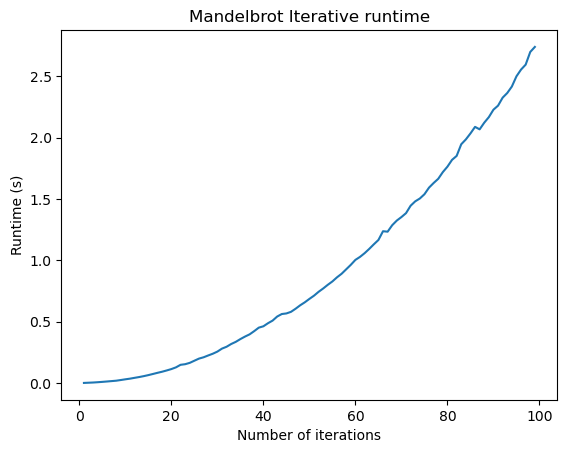

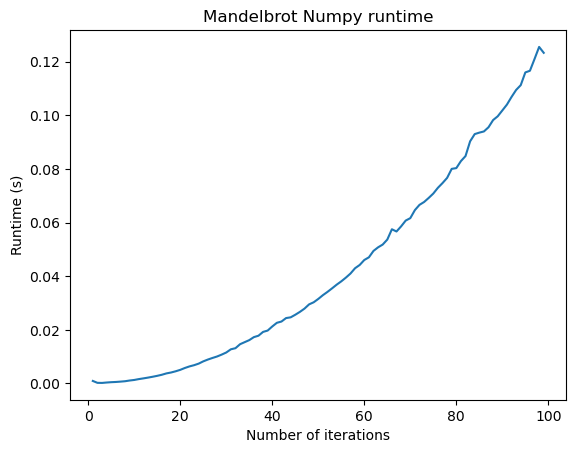

In [375]:
import timeit

n_vals = np.arange(1, 100, 1)

# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-1.5, 0.5, 30), np.linspace(-1, 1, 30))
zz = xx + 1j * yy

all_times = []
for n in n_vals:
    time1 = timeit.timeit(
        "mandelbrot_iterative(zz, maxiter=n)", globals=globals(), number=n
    )
    time2 = timeit.timeit(
        "mandelbrot_numpy(zz, maxiter=n)", globals=globals(), number=n
    )
    all_times.append([time1, time2])
all_times = np.array(all_times)

plt.figure()
plt.plot(n_vals, all_times[:, 0])
plt.title("Mandelbrot Iterative runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

plt.figure()
plt.plot(n_vals, all_times[:, 1])
plt.title("Mandelbrot Numpy runtime")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

Our numpy vectorized implementation is fast enough that we can zoom in and explore the fractal structure of the Mandelbrot set.

Text(0.5, 1.0, 'Mandelbrot Set Angle (Zoomed In)')

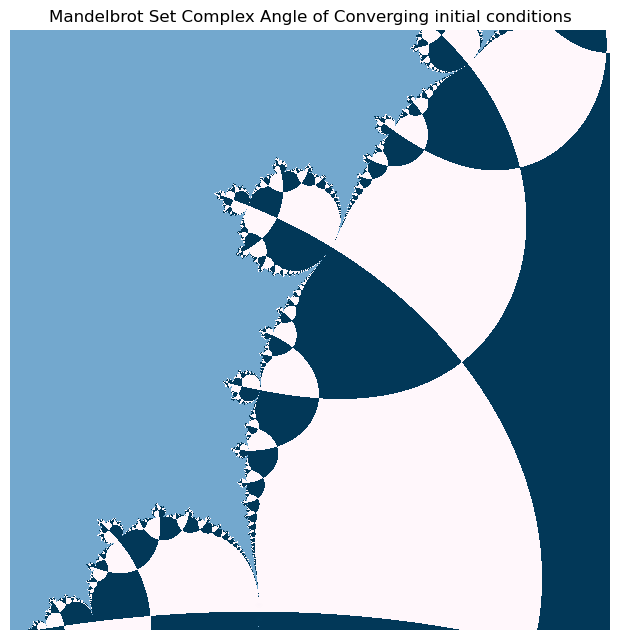

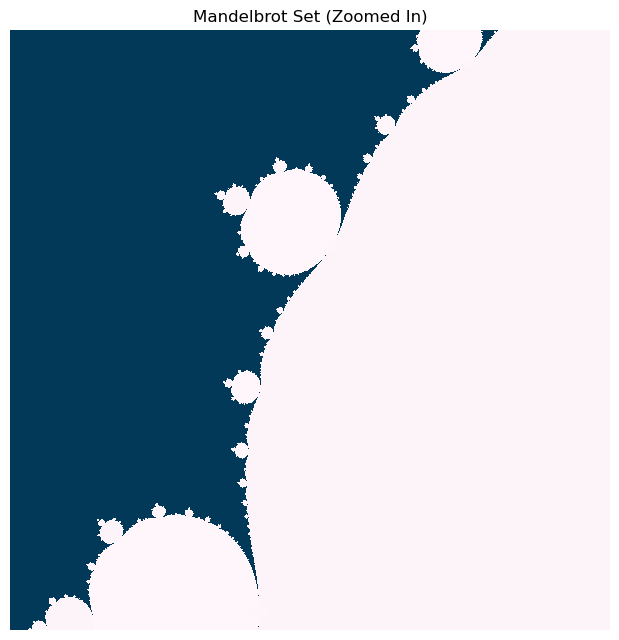

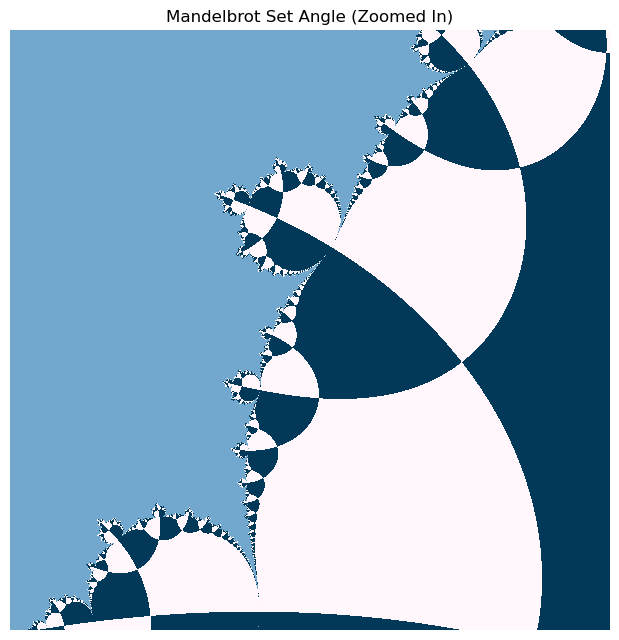

In [367]:
plt.figure(figsize=(12, 6))
plt.imshow(np.angle(horizon_vals), cmap="PuBu")
plt.axis('off'); plt.tight_layout(pad=0) # remove all axes, padding, and ticks
plt.title("Mandelbrot Set Complex Angle of Converging initial conditions")


# define the x, y meshpoints at which we will compute the mandelbrot set
xx, yy = np.meshgrid(np.linspace(-0.385, -0.355, 600), np.linspace(-0.52, -0.55, 600))
zz = xx + 1j * yy
horizon_vals = mandelbrot_numpy(zz, maxiter=10*100)
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(horizon_vals), cmap="PuBu")
plt.axis('off'); plt.tight_layout(pad=0) # remove all axes, padding, and ticks
plt.title("Mandelbrot Set (Zoomed In)")


plt.figure(figsize=(6, 6))
plt.imshow(np.angle(horizon_vals), cmap="PuBu")
plt.axis('off'); plt.tight_layout(pad=0) # remove all axes, padding, and ticks
plt.title("Mandelbrot Set Angle (Zoomed In)")